In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
data=pd.read_csv('final_dataset.csv')
data.drop(['Unnamed: 0','location_details','property_name'],axis=1,inplace=True)

In [3]:
data.duplicated().sum()

76

In [4]:
#to extract the year from the completion status feature
def search(x):
    ob1=re.compile(r'\d{4}')
    ob2=ob1.findall(x)
    if(len(ob2)!=0):
        temp=ob2[0]
    else:
        temp=2023
    return temp

In [5]:
#to extract the year from the completion status feature
def rooms(x):
    ob1=re.compile(r'\d')
    ob2=ob1.findall(x)
    if(len(ob2)!=0):
        temp=ob2[0]
    else:
        temp=0
    return temp

In [6]:
def extract_age(x):
    temp=2023-int(x)
    return temp

In [7]:
data['completion_status']=data['completion_status'].map(search)
data['age_of_building']=data['completion_status'].map(extract_age)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '2020'),
  Text(1, 0, '2019'),
  Text(2, 0, '2023'),
  Text(3, 0, '2015'),
  Text(4, 0, '2022'),
  Text(5, 0, '2024'),
  Text(6, 0, '2017'),
  Text(7, 0, '2023'),
  Text(8, 0, '2026'),
  Text(9, 0, '2027'),
  Text(10, 0, '2021'),
  Text(11, 0, '2025'),
  Text(12, 0, '2018'),
  Text(13, 0, '2016'),
  Text(14, 0, '2014'),
  Text(15, 0, '2028')])

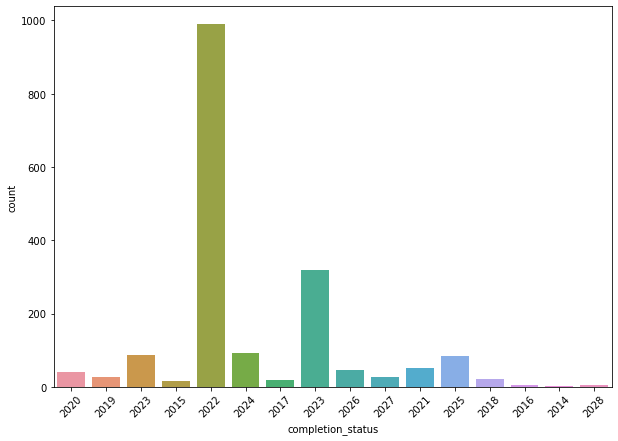

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(data['completion_status'])
plt.xticks(rotation=45)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '-5'),
  Text(1, 0, '-4'),
  Text(2, 0, '-3'),
  Text(3, 0, '-2'),
  Text(4, 0, '-1'),
  Text(5, 0, '0'),
  Text(6, 0, '1'),
  Text(7, 0, '2'),
  Text(8, 0, '3'),
  Text(9, 0, '4'),
  Text(10, 0, '5'),
  Text(11, 0, '6'),
  Text(12, 0, '7'),
  Text(13, 0, '8'),
  Text(14, 0, '9')])

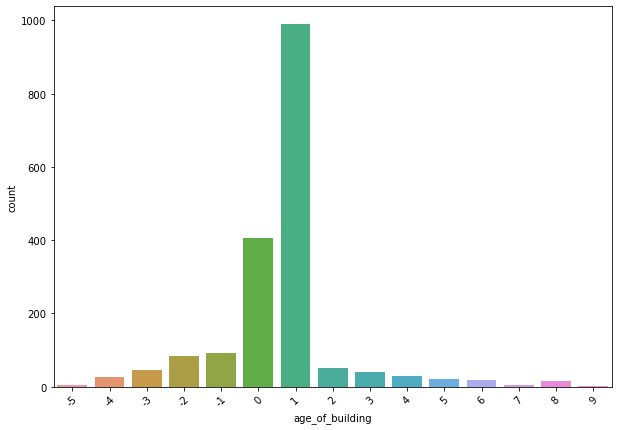

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(data['age_of_building'])
plt.xticks(rotation=45)


In [10]:
data=data.drop_duplicates(None).reset_index()
data['no_rooms']=data['size'].map(rooms)
data.drop(['completion_status','index','size'],axis=1,inplace=True)

# Data preprocessing

In [11]:
data['price_per_sq']=data['price_per_sq_ft']
data.drop('price_per_sq_ft',axis=1,inplace=True)

In [12]:
data.describe()

,avg_area,avg_price,age_of_building,price_per_sq
count,1.710000e+03,1710.000000,1710.000000,1710.000000
mean,5.059367e+03,180.730825,0.633333,0.088212
std,9.209207e+04,418.252252,1.761878,0.102903
min,8.194000e+01,6.990000,-5.000000,0.000010
25%,1.099000e+03,59.131250,0.000000,0.053445
50%,1.309500e+03,94.460000,1.000000,0.070764
75%,2.100000e+03,185.875000,1.000000,0.102213
max,3.750000e+06,13520.000000,9.000000,2.556749


In [13]:
#removing outliers from price_per_square_feet
lower_limit=np.percentile(data['avg_price'],2)
upper_limit=np.percentile(data['avg_price'],95)
print(lower_limit,upper_limit)
data.drop(data[(data['avg_price']<lower_limit) | (data['avg_price']>upper_limit)].index,axis=0,inplace=True)

20.1188 551.3749999999999


In [14]:
df2=pd.read_csv('final_dataset.csv')
df2.drop(['Unnamed: 0','location_details','property_name'],axis=1,inplace=True)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_price'>

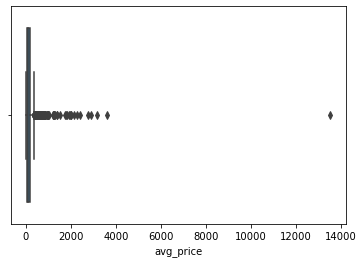

In [15]:
sns.boxplot(df2['avg_price'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_price'>

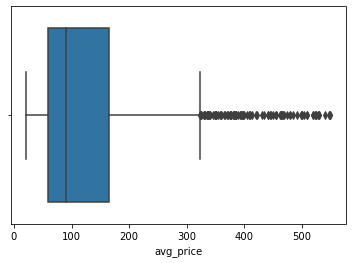

In [16]:
sns.boxplot(data['avg_price'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_area'>

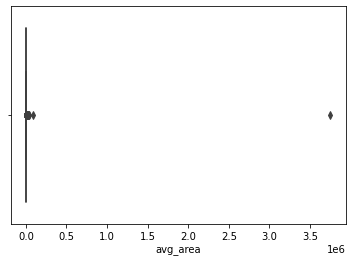

In [17]:
sns.boxplot(data['avg_area'])

In [18]:
#removing the outliers from the avg area from the box plot we can observe that there are outliers
lower_limit=np.percentile(data['avg_area'],96)
data.drop(data[(data['avg_area']>lower_limit)].index,axis=0,inplace=True)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_area'>

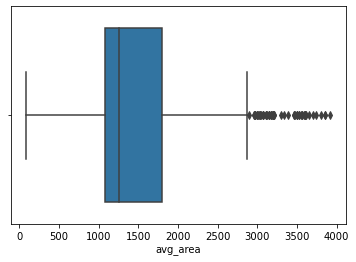

In [19]:
sns.boxplot(data['avg_area'])

In [20]:
data.reset_index(drop=bool,inplace=True)

# Model Building 

In [21]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
df1=data[data['no_rooms']!=0]

In [23]:
df1['no_rooms']=df1['no_rooms'].astype('int')

C:\Users\asus\AppData\Local\Temp\ipykernel_14172\3769564286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['no_rooms']=df1['no_rooms'].astype('int')


In [24]:
df1.drop('price_per_sq',axis=1,inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_14172\518466072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('price_per_sq',axis=1,inplace=True)


In [25]:
model_name=[]
accuray=[]

In [26]:
df1=pd.get_dummies(df1,drop_first=True)

In [64]:
X=df1.drop('avg_price',axis=1)
y=df1['avg_price']
#splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=7)

In [54]:
#model1 linea regression
model1=LinearRegression()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
model_name.append('Linear Regression')
accuray.append(r2_score(y_pred,y_test))
print(r2_score(y_pred,y_test))

0.5206810212625415


In [48]:
#model2 KNN
model2=KNeighborsRegressor()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print(r2_score(y_pred,y_test))
model_name.append('KNN Regressor')
accuray.append(r2_score(y_pred,y_test))

0.5480625136897315


In [58]:
from sklearn.svm import SVR,SVC
from sklearn.ensemble import RandomForestRegressor

In [49]:
#model3 DecisionTree regressor
model3=DecisionTreeRegressor()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
print(r2_score(y_pred,y_test))
model_name.append('DecisionTree Regressor')
accuray.append(r2_score(y_pred,y_test))

0.5411009191906001


In [65]:
#model3 Random Forest regressor
model3=RandomForestRegressor()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
print(r2_score(y_pred,y_test))
model_name.append('Random Forest Regressor')
accuray.append(r2_score(y_pred,y_test))

0.6240095912340391


In [50]:
#model4 SVM regression
model3=SVR()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
print(r2_score(y_pred,y_test))
model_name.append('Support Vector')
accuray.append(r2_score(y_pred,y_test))

-2.5390608838206967


In [33]:
for i in range(0,50):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=i)   #best is 41
    #model2 linea regression
    model3=RandomForestRegressor()
    model3.fit(X_train,y_train)
    y_pred=model3.predict(X_test)
    print(i,'=====>',r2_score(y_pred,y_test))

0 =====> 0.5295909491660299
1 =====> 0.41391184095806954
2 =====> 0.5279680980866717
3 =====> 0.5331294936477227
4 =====> 0.6597517525104081
5 =====> 0.4856352901402142
6 =====> 0.5333181997465986
7 =====> 0.6262130768120819
8 =====> 0.6068723207564937
9 =====> 0.5025381689754007
10 =====> 0.6185347801801259
11 =====> 0.6031491412157688
12 =====> 0.5925942769794967
13 =====> 0.6188860701035104
14 =====> 0.6008425231677932
15 =====> 0.5673272572717193
16 =====> 0.5138477473015101
17 =====> 0.5968575536594007
18 =====> 0.567121448916432
19 =====> 0.688236633454711
20 =====> 0.5808677083316419
21 =====> 0.5655027544291267
22 =====> 0.6685099180975513
23 =====> 0.5916706588610463
24 =====> 0.5829755697759114
25 =====> 0.5474355933421586
26 =====> 0.6199968363444659
27 =====> 0.609100924354173
28 =====> 0.6008683230276519
29 =====> 0.5594648560912701
30 =====> 0.45601995518518845
31 =====> 0.5883108861302566
32 =====> 0.5937493426318192
33 =====> 0.59388725322254
34 =====> 0.686672103610542

In [34]:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=41)   #best is 41
    #model2 linea regression
    model3=RandomForestRegressor()
    model3.fit(X_train,y_train)
    y_pred=model3.predict(X_test)
    print(i,'=====>',r2_score(y_pred,y_test))
    model_name.append('Random Forest Regressor')
    accuray.append(r2_score(y_pred,y_test))
    print(r2_score(y_pred,y_test))

49 =====> 0.7013282023201328
0.7013282023201328


In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor

In [36]:
X=df1.drop('avg_price',axis=1)
y=df1['avg_price']

In [39]:
#
seed = 0

kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cart = RandomForestRegressor()
num_trees = 100

model = BaggingRegressor(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())
model_name.append('Bagging Regressor')
accuray.append(results.mean())

0.7039187324241847


In [40]:
seed = 0

kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cart = RandomForestRegressor()
num_trees = 100

model = AdaBoostRegressor(base_estimator=cart, n_estimators=num_trees, random_state=seed)
#results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())
model_name.append('AdaBoostRegressor')
accuray.append(results.mean())

0.7039187324241847


In [41]:
from xgboost import XGBRegressor

In [42]:
seed = 0

kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cart = RandomForestRegressor()
num_trees = 100

model = XGBRegressor(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())
model_name.append('XGBRegressor')
accuray.append(results.mean())

[14:08:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[14:08:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[14:08:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[14:08:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[14:08:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "base_estimato

In [55]:
result=pd.DataFrame()

In [56]:
result['Model Name']=model_name
result['Accuracy']=accuray

In [57]:
result.sort_values('Accuracy',ascending=False)

,Model Name,Accuracy
1,Bagging Regressor,0.703919
2,AdaBoostRegressor,0.703919
0,Random Forest Regressor,0.701328
3,XGBRegressor,0.651371
4,KNN Regressor,0.548063
5,DecisionTree Regressor,0.541101
7,Linear Regression,0.520681
6,Support Vector,-2.539061


In [46]:
df=pd.read_csv('final_dataset.csv')
df.drop(['Unnamed: 0','location_details','property_name'],axis=1,inplace=True)

In [ ]:
df['completion_status']=df['completion_status'].map(search)
df['age_of_building']=df['completion_status'].map(extract_age)

In [ ]:
df.drop(['completion_status','price_per_sq_ft'],axis=1,inplace=True)

In [ ]:
df['availability'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
enco=LabelEncoder()

In [ ]:
df

In [ ]:
X=df.drop('avg_price',axis=1)
y=df['avg_price']

In [ ]:
df['area_type'].unique()

In [ ]:
from pipes import makepipeline

In [ ]:
column_tran=make_column_transformer((OneHotEncoder(sparse=False),['region','size','availability','area_type']),remainder='passthrough')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=41)   #best is 41

In [ ]:
sclar=StandardScaler()
model=RandomForestRegressor()

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipe=make_pipeline(column_tran,model)

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
y_pred=pipe.predict(X_test)